In [1]:
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import Axes3D
from  matplotlib.patches import Polygon
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [2]:
def hullit3D(xyz):
    hull = ConvexHull(xyz)
    x, y, z = xyz[hull.vertices][:, 0], xyz[hull.vertices][:, 1], xyz[hull.vertices][:, 2]
    return x, y, z

def make_xplane(x, ys, ye, zs, ze):
    return Poly3DCollection([[[x, x, x, x], [ys, ye, ye, ys], [zs, zs, ze, ze]]])

def make_collections(x, y, z):
    collections = []
    for _, (iA, jA, kA) in enumerate(list(zip(x, y, z))):
        for __, (iB, jB, kB) in enumerate(list(zip(x[_:], y[_:], z[_:]))):
            for iC, jC, kC in list(zip(x[__+_:], y[__+_:], z[__+_:])):
                p = Poly3DCollection([[[iA, jA, kA], [iB, jB, kB], [iC, jC, kC]]])
                collections.append(p)
        return collections
    
def hullplot3D(x, y, z, ax, color):
    for c in  make_collections(x, y, z):
        c.set_facecolor(color)
        c.set_edgecolor('black')
        c.set_alpha(0.1)
        ax.add_collection(c)

def colorfulHullplot3D(collections, ax, colors, alpha=0.2):
    for c, clr in  zip(collections, colors):
        c.set_facecolor(clr)
        c.set_alpha(alpha)
        c.set_edgecolor('black')
        c.set_linewidth(0.2)
        ax.add_collection(c)    

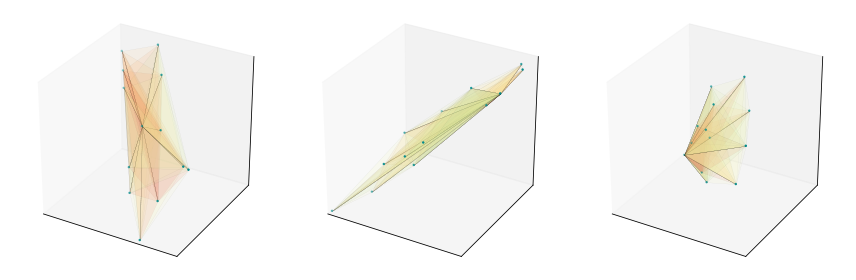

In [3]:
n = 3
fig = plt.figure(figsize=(n*4, 4))
m = 20
#colors = [np.random.random((3,)) for i in range(m*(m-1)*(m-2))]
colors = [cm.Spectral(i*2) for i in range(m*(m-1)*(m-2))]
xyz = np.random.random((m, 3))
#x, y, z = hullit3D(xyz)
#print(x.shape, y.shape, z.shape)
#collections = make_collections(x, y, z)
#colorfulHullplot3D(collections, ax, colors)
#hullplot3D(x, y, z, ax, 'crimson')
#transformation = np.array([[-1, 0.5, -1], [0.5, 0.5, 1], [0.2, 0.5, -0.9]])

for i in range(n):
    #transformation = np.random.random((m, m))
    #xyzn = transformation.dot(xyz)
    ax = fig.add_subplot(1, n, i+1, projection='3d')
    transformation = np.random.random((3, 3))-0.5
    xyzn = xyz.dot(transformation)
    
    xt, yt, zt = hullit3D(xyzn)
    collections = make_collections(xt, yt, zt)
    colorfulHullplot3D(collections, ax, colors, alpha=0.1)
    ax.scatter(xt, yt, zt, color='darkcyan', s=2)

    ax.set_xlim(np.min(xt), np.max(xt))
    ax.set_ylim(np.min(yt), np.max(yt))
    ax.set_zlim(np.min(zt), np.max(zt))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
fig.tight_layout()

In [4]:
xyzn.shape

(20, 3)

In [5]:
def gen_crane_triangles():
    return np.array([np.array(i) for i in [
        [[0, 0, 0], [1, 0, 0], [1/2, 1, 1]],
        [[0, 0, 0], [1, 0, 0], [1/2, -1, 1]],
        [[0, 0, 0], [1, 0, 0], [1, 1, 1]],
        [[1, 0, 0], [0, 0, 0], [-1, 0, 1]]]])

def make_crane_collections(points, xshift=0):
    c = []
    for (iA, jA, kA), (iB, jB, kB), (iC, jC, kC) in points:
        p = Poly3DCollection([[[iA+xshift, jA, kA], [iB+xshift, jB, kB], [iC+xshift, jC, kC]]])
        c.append(p)
    return c

In [6]:
class Crane:
    def __init__(self):
        self.__right_wing = np.array([[0, 0, 0], [1, 0, 0], [1/2, 1, 1]])
        self.__left_wing = np.array([[0, 0, 0], [1, 0, 0], [1/2, -1, 1]])
        self.__head = np.array([[0, 0, 0], [1, 0, 0], [1, 1, 1]])
        self.__tail = np.array([[1, 0, 0], [0, 0, 0], [-1, 0, 1]])

    def transform_wwht(self, wings_matrix, head_matrix, tail_matrix):
        if any(i.shape != (3, 3) for i in (wings_matrix, head_matrix, tail_matrix)):
            print('invalid transformations - shapes must be 3 x 3')
            return
        self.__right_wing = self.__right_wing.dot(wings_matrix)
        self.__left_wing = self.__left_wing.dot(wings_matrix)
        self.__head = self.__head.dot(head_matrix)
        self.__tail = self.__tail.dot(tail_matrix)

    def get_collections(self):
        return [Poly3DCollection([i]) for i in [self.__right_wing, self.__left_wing, self.__head, self.__tail]]

    def getx(self):
        return [j[0] for i in [self.__right_wing, self.__left_wing, self.__head, self.__tail] for j in i]
    def gety(self):
        return [j[1] for i in [self.__right_wing, self.__left_wing, self.__head, self.__tail] for j in i]
    def getz(self):
        return [j[2] for i in [self.__right_wing, self.__left_wing, self.__head, self.__tail] for j in i]
    

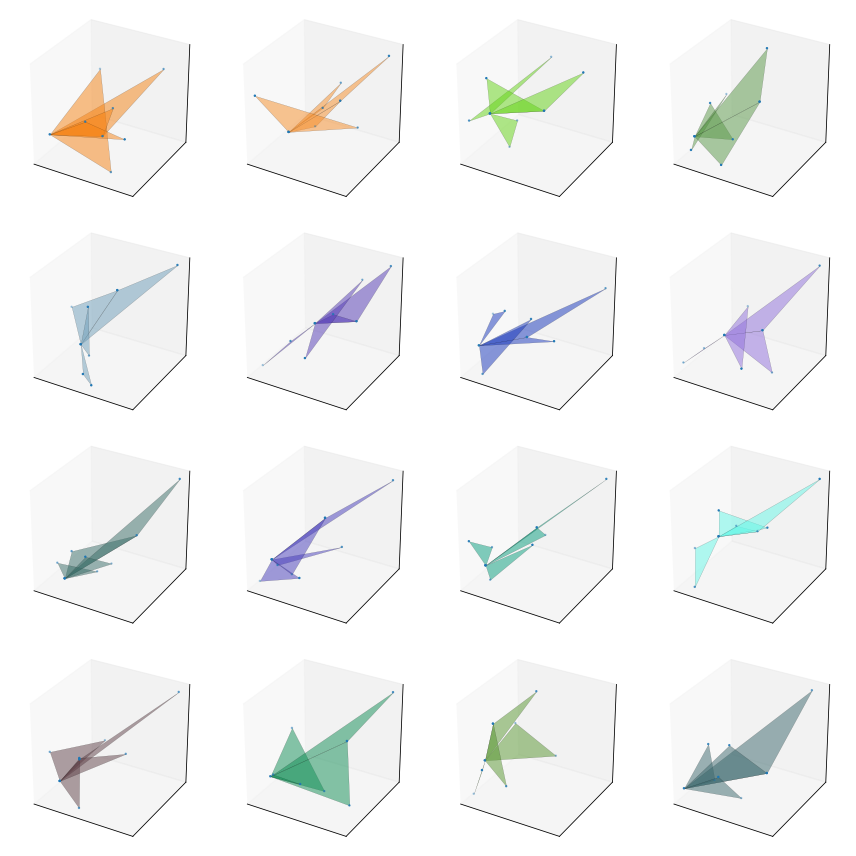

In [7]:
n = 4
fig = plt.figure(figsize=(3*n, 3*n))
#crane = Crane()
for i in range(n):
    for j in range(n):
        crane = Crane()
        crane.transform_wwht(np.random.random((3, 3)), np.random.random((3, 3))-0.5, np.random.random((3, 3)))
        ax = fig.add_subplot(n, n, i*n+j+1, projection='3d')
        colorfulHullplot3D(crane.get_collections(), ax, [np.random.random((3,))]*4, alpha=0.5)
        ax.scatter(crane.getx(), crane.gety(), crane.getz(), s=2)
        #ax.axis('off')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])
       
fig.tight_layout()

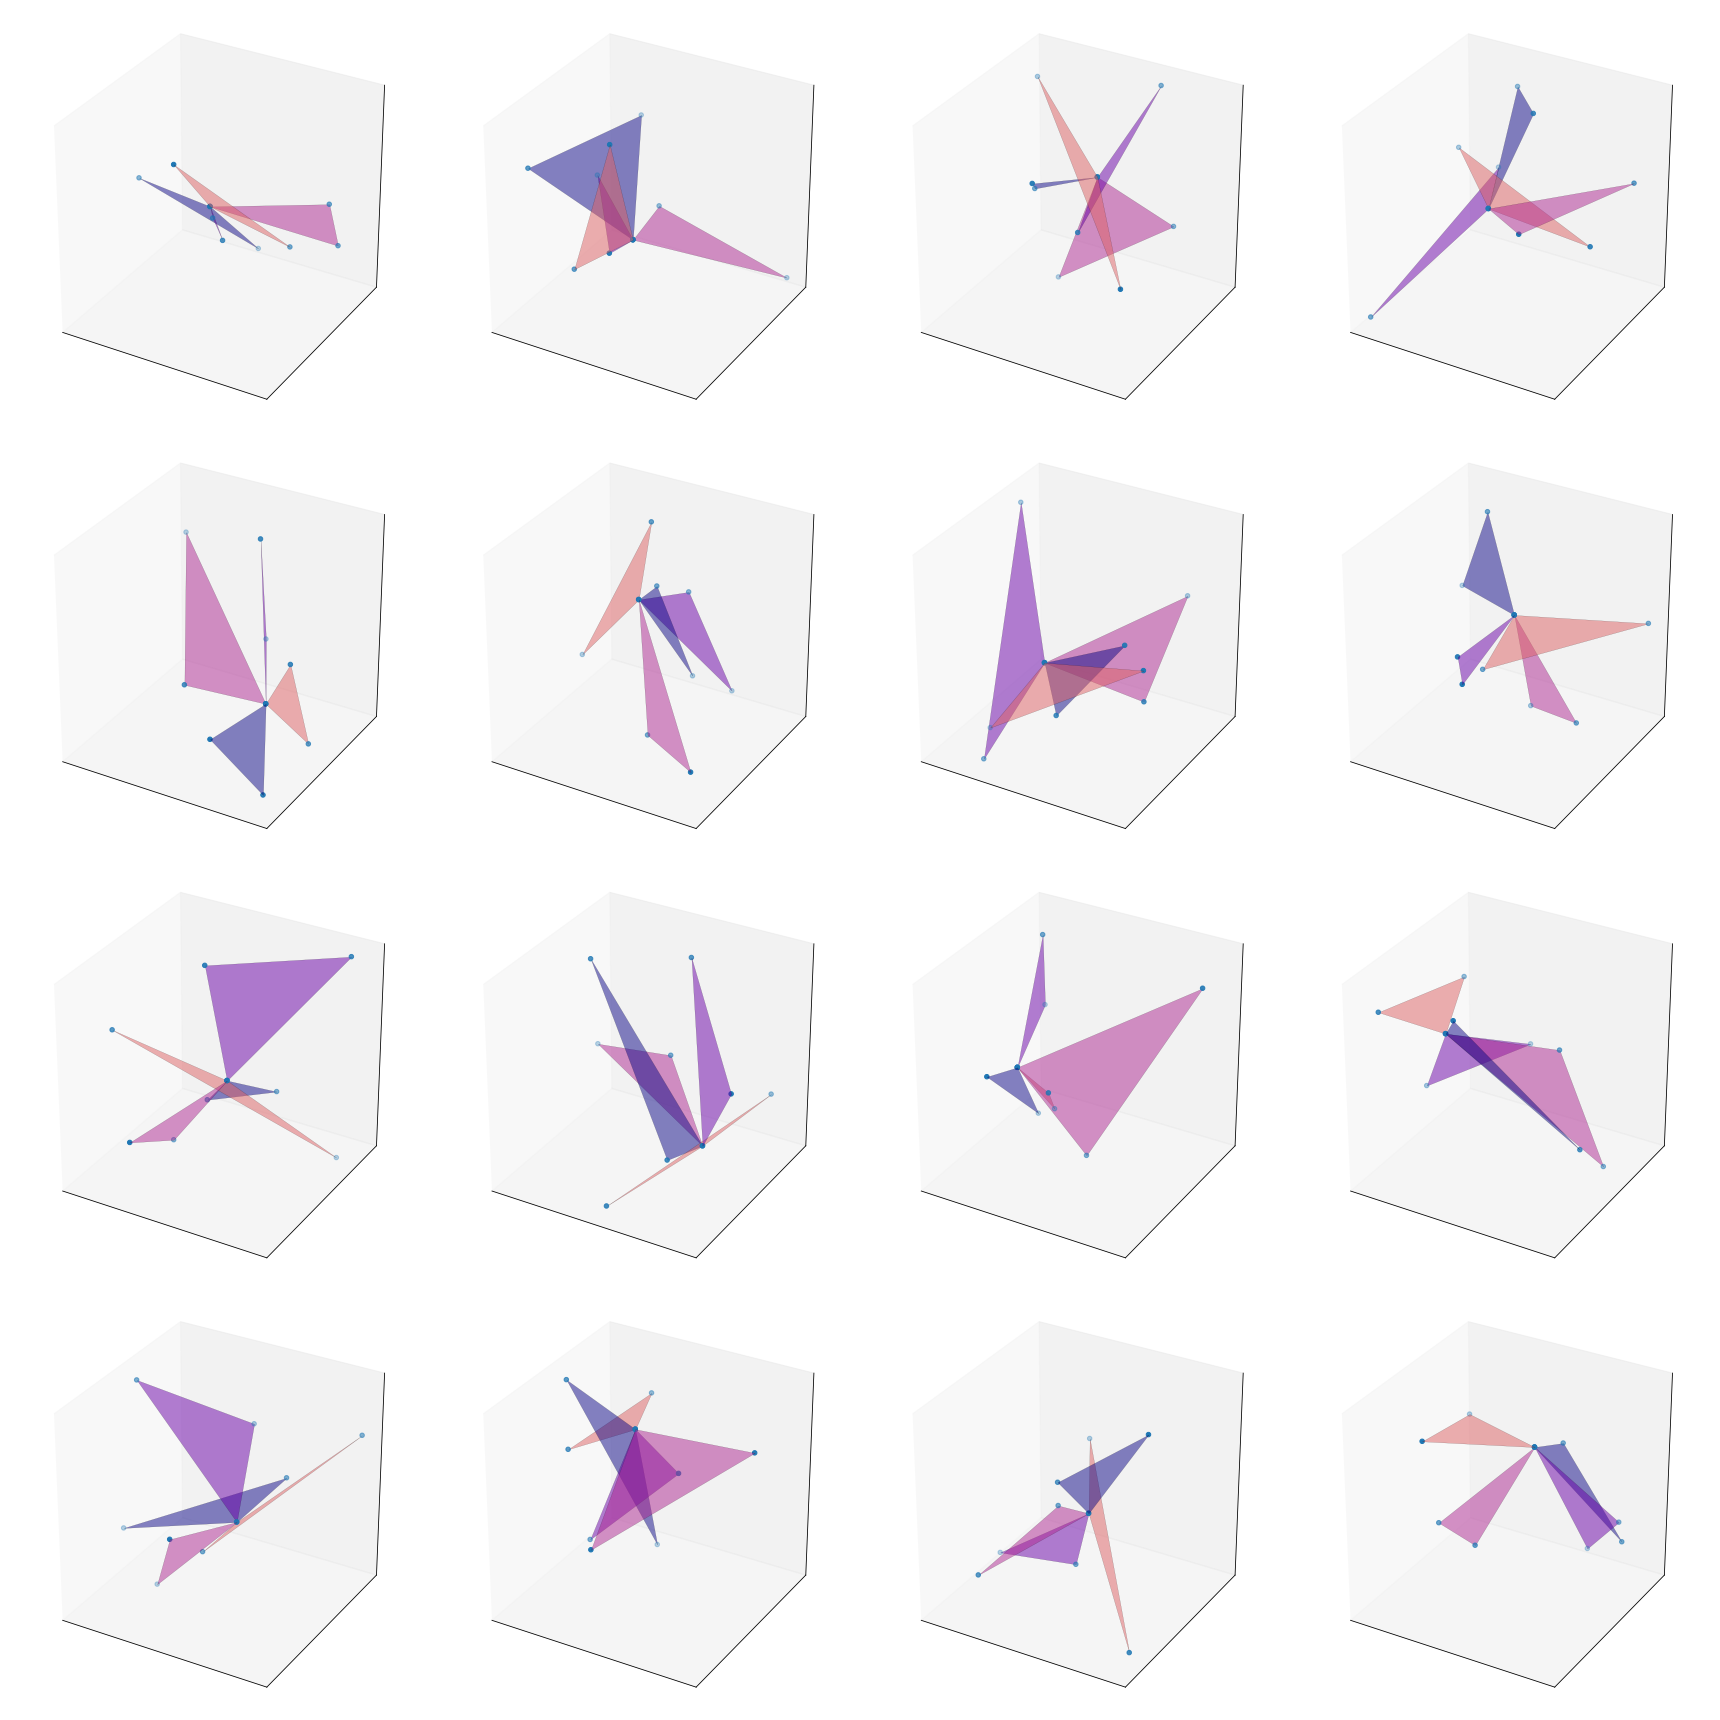

In [8]:
fig = plt.figure(figsize=(24, 24))

xyz = gen_crane_triangles()
c = make_crane_collections(xyz)
colorfulHullplot3D(c, ax, [cm.Spectral(_) for _ in range(len(c))])
p = np.array([i.flatten() for i in xyz.T])
ax.scatter(p[0], p[1], p[2])

n = 4

for i in range(n):
    for j in range(n):
        ax = fig.add_subplot(n, n, i*n+j+1, projection='3d')
        xyzt = np.array([_.dot(t) for _, t in zip(xyz, np.random.random((len(xyz), 3, 3))-0.5)])
        p = np.array([_.flatten() for _ in xyzt.T])
        ax.scatter(p[0], p[1], p[2])
        c = make_crane_collections(xyzt, 0)
        colorfulHullplot3D(c, ax, [cm.plasma(_*50) for _ in range(len(c))], alpha=0.5)

        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])

fig.tight_layout()        

In [9]:
gen_t = lambda: np.random.random((3, 3))
a, b, c = gen_t(), gen_t(), gen_t()
a1, b1, c1 = np.linalg.inv(a), np.linalg.inv(b), np.linalg.inv(c)

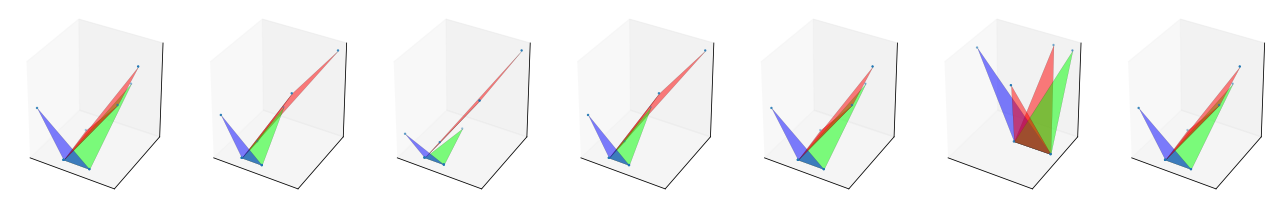

In [10]:
n = 4
fig = plt.figure(figsize=(18, 3))
crane = Crane()
for i, t in enumerate([c, b, a, a1, b1, c1, c]):
    crane.transform_wwht(t, np.identity(3), np.identity(3))
    ax = fig.add_subplot(1, 7, i+1, projection='3d')
    colorfulHullplot3D(crane.get_collections(), ax, [(1, 0, 0), (1, 0, 0), (0, 1, 0), (0, 0, 1)], alpha=0.5)
    ax.scatter(crane.getx(), crane.gety(), crane.getz(), s=2)
    #ax.axis('off')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
fig.tight_layout()

[]

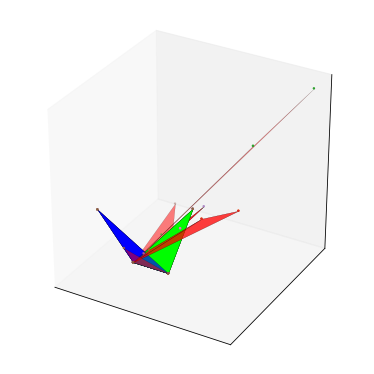

In [15]:
n = 4
fig = plt.figure(figsize=(5, 5))
crane = Crane()
ax = Axes3D(fig)
for i, t in enumerate([c, b, a, a1, b1, c1, c]):
    crane.transform_wwht(t, np.identity(3), np.identity(3))
    #ax = fig.add_subplot(1, 7, i+1, projection='3d')
    colorfulHullplot3D(crane.get_collections(), ax, [(1, 0, 0), (1, 0, 0), (0, 1, 0), (0, 0, 1)], alpha=0.5)
    ax.scatter(crane.getx(), crane.gety(), crane.getz(), s=2)
    #ax.axis('off')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

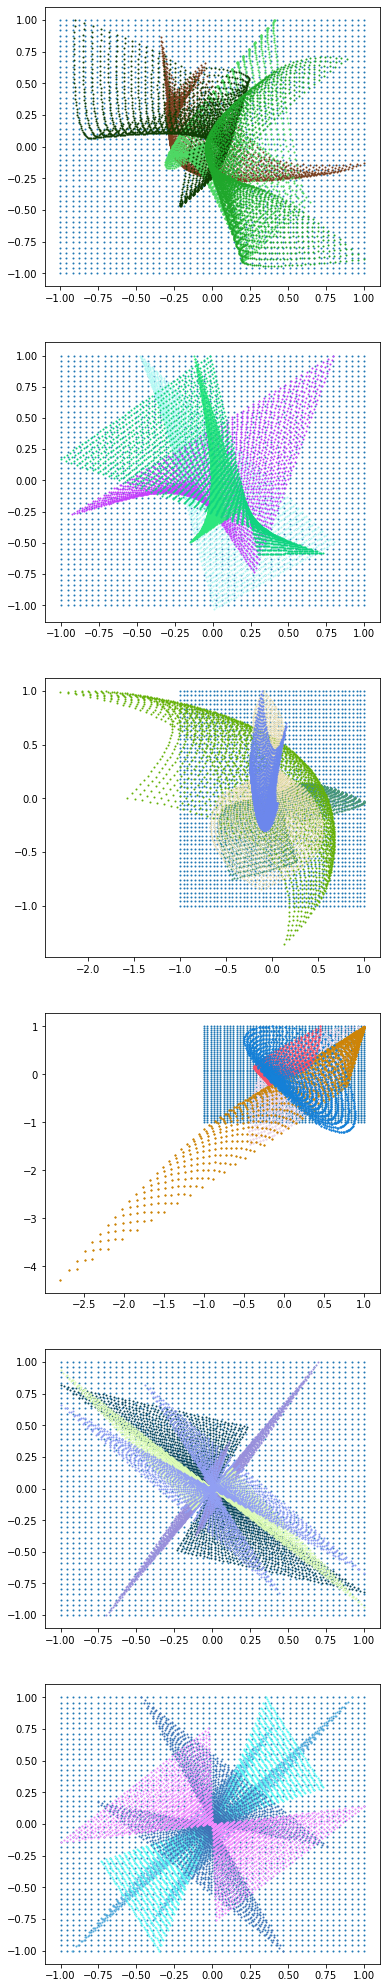

In [5]:
n = 50
p = np.linspace(-1, 1, n)
x, y = np.meshgrid(p, p)
x, y = x.flatten(), y.flatten()

fig, ax = plt.subplots(6, 1, figsize=(6, 36))
for j, A in enumerate(\
    [np.array([x, y, x*y, x**2, y**2]),
     np.array([x, y, x*y]),
     np.array([x, y, x**2, y**2]),
     np.array([x*y, x**2, y**2]),
     np.array([x, x*y]),
     np.array([y, x*y])]):
    ax[j].scatter(x, y, s=1)
    for i in range(4):
        transformation_short = np.random.random((2, A.shape[0]))-0.5
        AS = transformation_short.dot(A)
        AS = AS-np.mean(AS)
        AS = AS/np.max(AS)
        ax[j].scatter(AS[0], AS[1], s=1, color=np.random.random(3,))

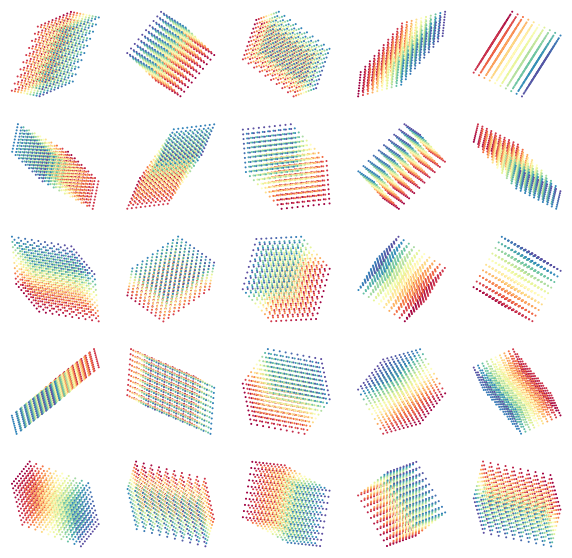

In [22]:
n = 10
p = np.linspace(0, 1, n)
x, y, z = np.meshgrid(p, p, p)
x, y, z = x.flatten(), y.flatten(), z.flatten()
fig, ax = plt.subplots(5, 5, figsize=(10, 10))
np.array([x, y, z])
A = np.array([x, y, z])
for i in range(5):
    for j in range(5):
        transformation_short = np.random.random((2, A.shape[0]))-0.5
        AS = transformation_short.dot(A)
        AS = AS-np.mean(AS)
        AS = AS/np.max(AS)
        ax[i][j].scatter(AS[0], AS[1], s=1, c=range(len(AS[0])), cmap='Spectral')
        ax[i][j].axis('off')

In [18]:
class SimpleButterfly3D:
    def __init__(self):
        self.__right_wing = np.array([[0, 0, 0], [1, 1, 1], [1, -1, 1]])
        self.__left_wing = np.array([[0, 0, 0], [-1, 1, 1], [-1, -1, 1]])

    def transform(self, matrix):
        if matrix.shape != (3, 3):
            print(f'invalid transformation shape {matrix.shape} - shape must be 3 x 3')
            return
        self.__right_wing = self.__right_wing.dot(matrix)
        self.__left_wing = self.__left_wing.dot(matrix)

    def get_collections(self):
        return [Poly3DCollection([i]) for i in [self.__right_wing, self.__left_wing]]

    def getx(self):
        return [j[0] for i in [self.__right_wing, self.__left_wing] for j in i]
    def gety(self):
        return [j[1] for i in [self.__right_wing, self.__left_wing] for j in i]
    def getz(self):
        return [j[2] for i in [self.__right_wing, self.__left_wing] for j in i]

    @classmethod
    def run_random_experiment(cls, n=3):
        fig = plt.figure(figsize=(2*n, 2))
        butterfly = cls()
        for i in range(n):
            butterfly.transform(np.random.random((3, 3))-0.5)
            ax = fig.add_subplot(1, n, i+1, projection='3d')
            colorfulHullplot3D(butterfly.get_collections(), ax, [np.random.random((3,))]*4, alpha=0.5)
            x, y, z = butterfly.getx(), butterfly.gety(), butterfly.getz()
            ax.scatter(x, y, z, s=2)
            #ax.axis('off')
            ax.set_xlim(np.min(x), np.max(x))
            ax.set_ylim(np.min(y), np.max(y))
            ax.set_zlim(np.min(z), np.max(z))
            #ax.axis('off')
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_zticks([])
        fig.tight_layout()
        fig.show()

    @classmethod
    def run_random_flight_experiment(cls, n=3):
        gen_t = lambda: np.random.random((3, 3))-0.5
        ts = [gen_t() for i in range(n)]
        ts1 = [np.linalg.inv(i) for i in ts]
        transformations = ts+ts1[::-1]

        fig = plt.figure(figsize=(4*n, 2))
        #ax = Axes3D(fig)

        butterfly = cls()
        for i, t in enumerate(transformations+[transformations[0]]):
            butterfly.transform(t)
            ax = fig.add_subplot(1, len(transformations)+1, i+1, projection='3d')
            colorfulHullplot3D(cls().get_collections(), ax, ['blue', 'cyan'], alpha=0.1)
            colorfulHullplot3D(butterfly.get_collections(), ax, ['crimson', 'orange'], alpha=0.2)
            x, y, z = butterfly.getx(), butterfly.gety(), butterfly.getz()
            ax.scatter(x, y, z, s=2)
            #ax.axis('off')
            ax.set_xlim(np.min(x), np.max(x))
            ax.set_ylim(np.min(y), np.max(y))
            ax.set_zlim(np.min(z), np.max(z))
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_zticks([])
        fig.show()


c:\users\diana\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:42: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


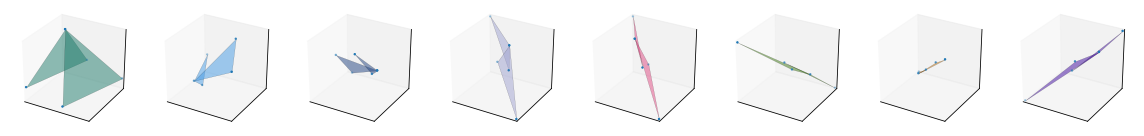

In [19]:
SimpleButterfly3D.run_random_experiment(8)

In [12]:
def plot_3D_triangle(t, ax, alpha=0.1, color='crimson'):
    ax.add_collection(Poly3DCollection([t.T], alpha=alpha, color=color))
    ax.scatter(t[0], t[1], t[2], color=color)
    
def plot_2D_triangle(t, ax, alpha=0.1, color='crimson'):
    ax.scatter(t[0], t[1], color=color)
    ax.plot(t[0]+[t[0][0]], t[1]+[t[1][0]], color=color)

def remove_ticks(ax):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

(-0.224986479177934,
 4.201189832341806,
 -0.22244586340921724,
 4.201068850638534)

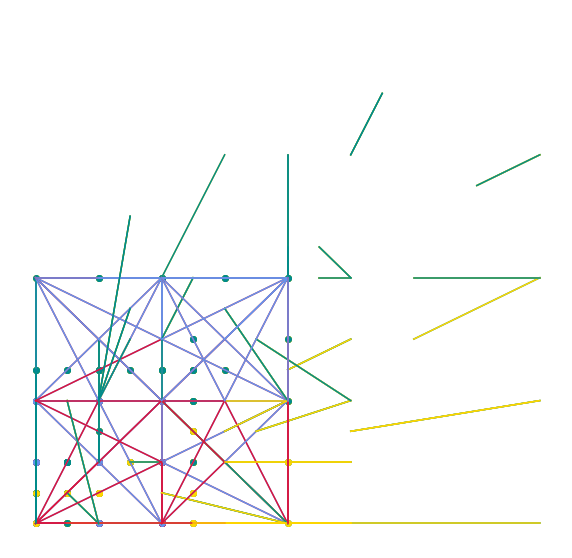

In [13]:
n = 5
p = np.array([0, 1/2, 1])
cs = np.meshgrid(p, p, p, p)
cs = [i.flatten() for i in cs]
#z = np.random.random((n,n))
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
#ax2 = fig.add_subplot(1, 2, 2, projection='3d')

#A = np.array([x.flatten(), y.flatten(), z.flatten()]).T
for t in zip(*cs):
    #ax = fig.add_subplot(1, n, i+1, projection='3d')
    t = np.array(t).reshape((2, 2))#np.random.random((3, 3))
    c = cm.Spectral(i*100)
    a = 0.4
    plot_2D_triangle(t, ax, color='crimson', alpha=a)
    plot_2D_triangle(t.T, ax, color='cornflowerblue', alpha=a)
    plot_2D_triangle(t.dot(t.T), ax, color='gold', alpha=a)
    plot_2D_triangle(t.T.dot(t), ax, color='darkcyan', alpha=a)

#remove_ticks(ax)
ax.axis('off')

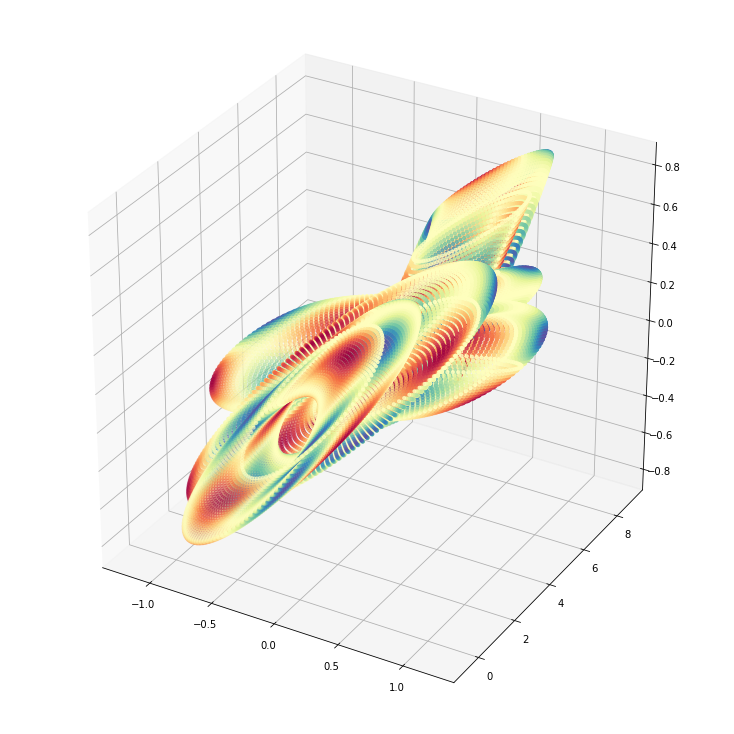

In [15]:
n = 100
p = np.linspace(0, np.pi*2, n)
a, b = np.meshgrid(p, p)
a, b = a.flatten(), b.flatten()
#colors = [cm.Spectral(np.log((i*j*k)**(1/3))) for i,j,k in zip(x, y, z)]
cs = [i*j*k for i, j, k in zip(x, y, z)]
fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig)

#ax.scatter(x, y, z, s=1)
for j, A in enumerate(\
    [np.array([np.sin(a),
               np.cos(a),
               np.sin(b),
               np.cos(b)])]):
    #c = np.random.random((3,))
    for i in range(5):
        transformation_short = np.random.random((3, A.shape[0]))/2
        AS = transformation_short.dot(A)
        #AS = AS-np.mean(AS)
        #AS = AS/np.max(AS)
        ax.scatter(AS[0]+j, AS[1]+2*i, AS[2], s=10, c=cs, cmap='Spectral')#color=c)
        


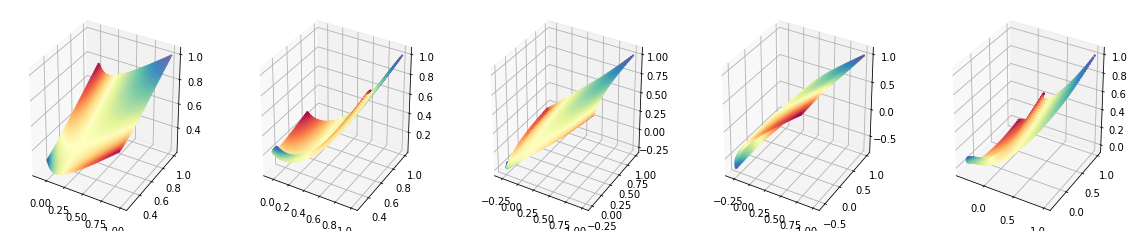

In [16]:
n = 100
p = np.linspace(-0.5, 0.5, n)
x, y = np.meshgrid(p, p)
x, y = x.flatten(), y.flatten()

fig = plt.figure(figsize=(20, 4))

cs = [i*j for i, j in zip(x, y)]
#ax.scatter(x, y, z, s=1)
#scoefs = [np.array([1, 10, 10**3, 10**5, 10**7, 10**9, 10, 10**3, 10**5, 10**7, 10**9]),
#         np.array([1, 10, 10**2, 10**3, 10, 10**2, 10**3, 10**5, 10**6])]
for j, A in enumerate(\
    [np.array([np.ones(x.shape), x, x**2, x**3, y, y**2, y**3, y**4, y**5]),
    np.array([np.ones(x.shape), x, x**2, x**3, x**4, y, y**2, y**3, y**4]),
    np.array([x, x**2, x**3, x**4, y, y**2, y**3, y**4]),
    np.array([x, x**2, x**3, x**4, x**5, y, y**2, y**3, y**4, y**5]),
    np.array([x, x**2, x**3, x**4, x**5, x**6, y, y**2, y**3, y**4, y**5, y**6])]):
    #A = np.array([i*scoefs[j] for i in A.T]).T
    #c = np.random.random((3,))
    ax = fig.add_subplot(1, 5, j+1, projection='3d')
    for i in range(1):
        transformation_short = np.random.random((3, A.shape[0]))/2
        AS = transformation_short.dot(A)
        #AS = AS-np.mean(AS)
        xt, yt, zt = AS[0], AS[1], AS[2]
        xt, yt, zt = xt/np.max(abs(xt)), yt/(np.max(abs(yt))), zt/(np.max(abs(zt)))
        ax.scatter(xt, yt, zt, s=2, c=cs, cmap='Spectral')#color=c)
        #ax.plot_surface(xt.reshape((n, n)), yt.reshape((n, n)), zt.reshape((n, n)), cmap='Spectral')
        


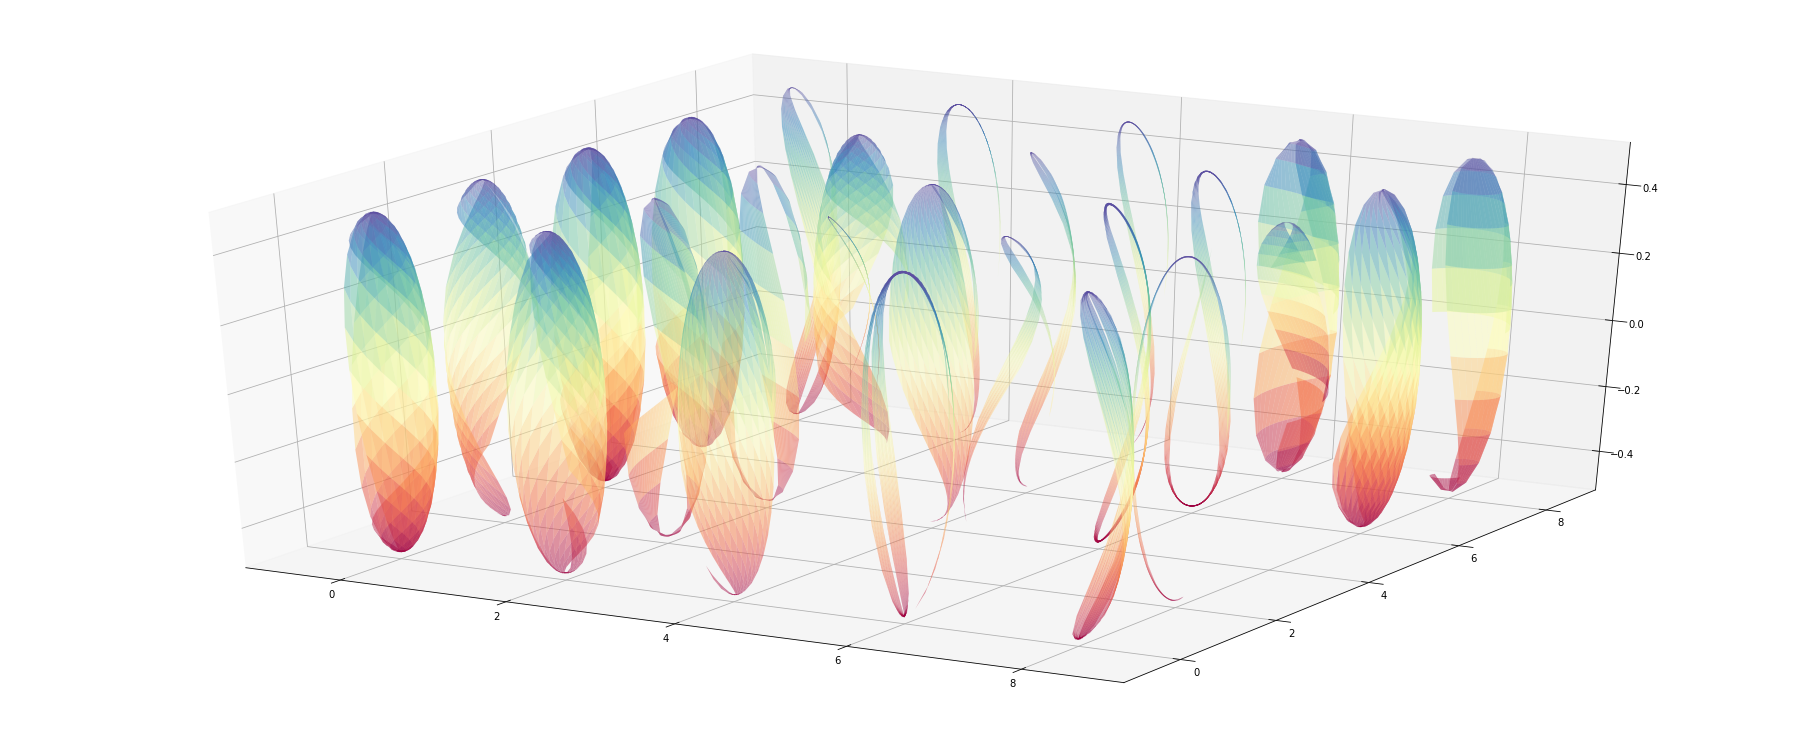

In [7]:
n = 20
p = np.linspace(0, np.pi*2, n)
a, b = np.meshgrid(p, p)
x, y, z = np.cos(b)*np.cos(a), np.cos(b)*np.sin(a), np.sin(b) 
#colors = [cm.Spectral(np.log((i*j*k)**(1/3))) for i,j,k in zip(x, y, z)]
cs = x*y*z
fig = plt.figure(figsize=(25, 10))
ax = Axes3D(fig)
#ax.scatter(x, y, z, s=1)
for j, A in enumerate(\
    [np.array([x, y, z, x*y, x*z, y*z]),
     np.array([x, y, z, x**2, y**2, z**2]),
     np.array([x, y, x*y]),
     np.array([x, y, z, x*z, y*z, x*z, x**2, y**2, z**2]),
     np.array([x*y, x*z, y*z])]):
    #c = np.random.random((3,))
    for i in range(5):
        t = np.random.random((2, 2))
        ab = np.array([a.flatten(),b.flatten()]).T.dot(t)
        ab = ab.T
        at, bt = ab[0].reshape((n, n)), ab[1].reshape((n, n))
        xt, yt, zt = np.cos(bt)*np.cos(at), np.cos(bt)*np.sin(at), np.sin(bt) 
        ax.plot_surface(xt/2+i*2, yt/2+j*2, zt/2, cmap='Spectral', alpha=0.5)

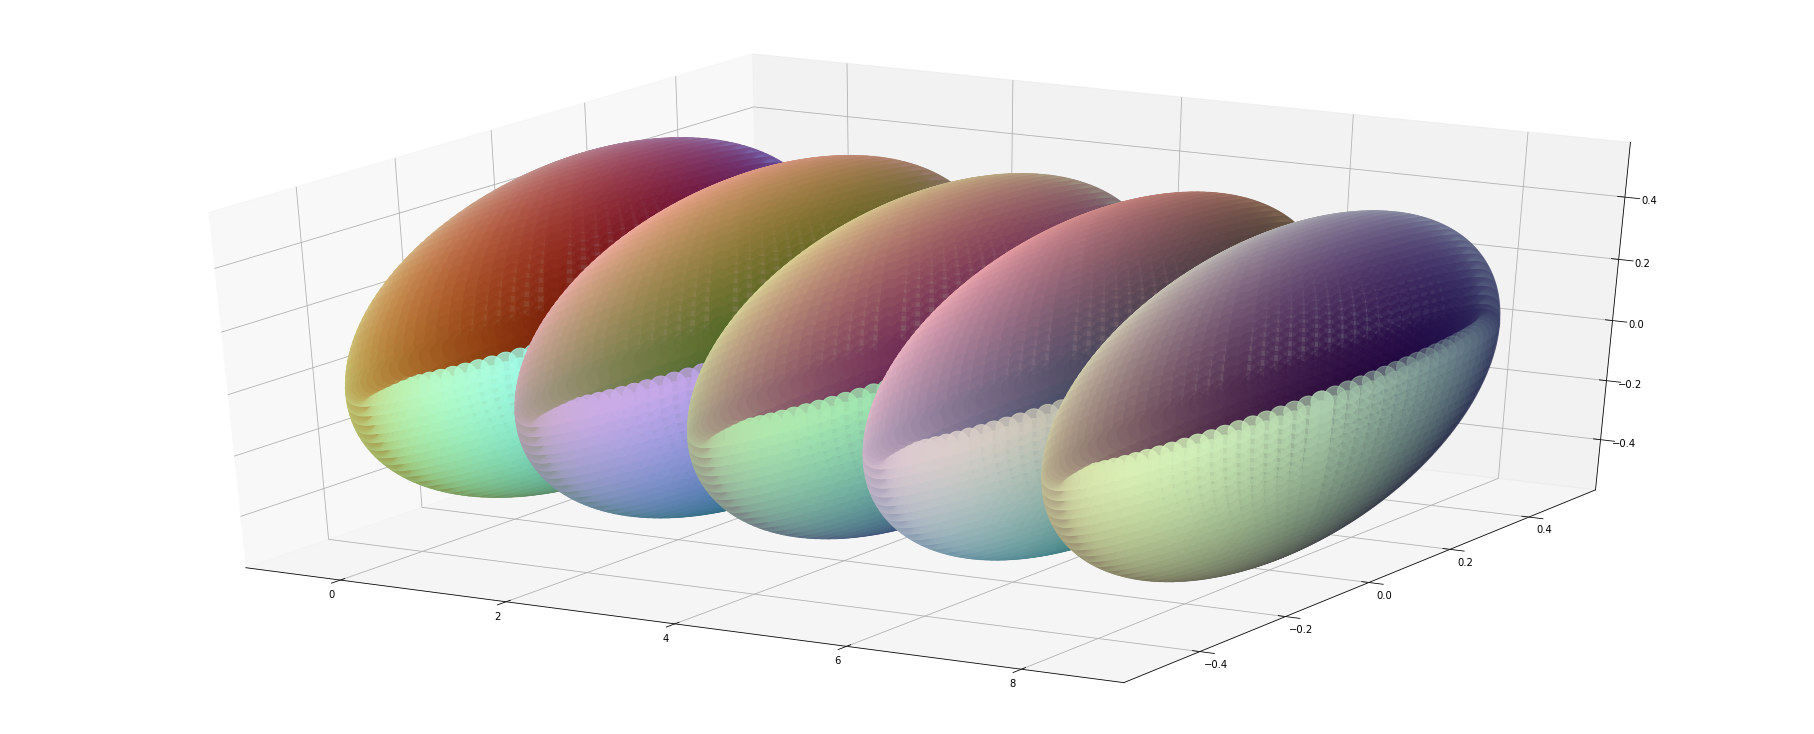

In [98]:
n = 100
p = np.linspace(0, np.pi*2, n)
a, b = np.meshgrid(p, p)
a, b = a.flatten(), b.flatten()
x, y, z = np.cos(b)*np.cos(a), np.cos(b)*np.sin(a), np.sin(b) 
#colors = [cm.Spectral(np.log((i*j*k)**(1/3))) for i,j,k in zip(x, y, z)]
cs = np.array([x, y, z]).T
cs = np.array(cs)
fig = plt.figure(figsize=(25, 10))
ax = Axes3D(fig)
for i in range(5):
    c = cs.dot(np.random.random((3,3)))
    c = c+abs(np.min(c))
    c = c/np.max(c)
    ax.scatter(x/2+i*2, -y/2, z/2, color=c, s=500)


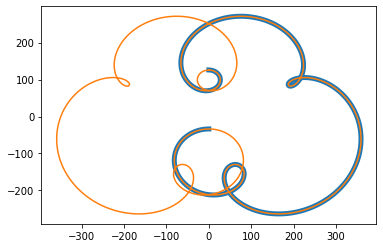

In [74]:
n = 20
p = np.arange(0, np.pi*10, 0.001)

coefs = np.random.random((n,))*np.linspace(0, 1, n)-0.5+0.01
coefs = 1/coefs
periods = np.random.random((n,))
coefs, periods = np.round(coefs, 1), np.round(periods, 1)
x = np.array([c*np.cos(p*s) for c, s in zip(coefs, periods)])
y = np.array([c*np.sin(p*s) for c, s in zip(coefs, periods)])
x, y = np.sum(x, axis=0), np.sum(y, axis=0)
plt.plot(y, x, lw=5)

p = np.arange(0, np.pi*20, 0.001)

coefs, periods = np.round(coefs, 1), np.round(periods, 1)
x = np.array([c*np.cos(p*s) for c, s in zip(coefs, periods)])
y = np.array([c*np.sin(p*s) for c, s in zip(coefs, periods)])
x, y = np.sum(x, axis=0), np.sum(y, axis=0)
plt.plot(y, x)

(10000, 4) (10000, 4)


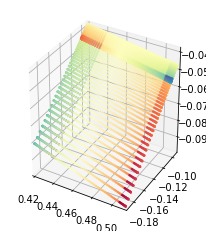

In [99]:
n = 100
p = np.linspace(-0.5, 0.5, n)
x, y = np.meshgrid(p, p)
x, y = x.flatten(), y.flatten()

fig = plt.figure(figsize=(20, 4))
'''
[np.array([x, x**2, x**3, y, y**2, y**3]),
    np.array([np.ones(x.shape), x, x**2, x**3, y, y**2, y**3]),
    np.array([np.ones(x.shape), x, x**3, x**5, y, y**3, y**5]),
'''
cs = [i*j for i, j in zip(x, y)]
#ax.scatter(x, y, z, s=1)
#scoefs = [np.array([1, 10, 10**3, 10**5, 10**7, 10**9, 10, 10**3, 10**5, 10**7, 10**9]),
#         np.array([1, 10, 10**2, 10**3, 10, 10**2, 10**3, 10**5, 10**6])]
for j, (X, Y) in enumerate(zip(
[np.array([np.ones(x.shape), x, x**2, x**3])],
[np.array([np.ones(y.shape), y, y**2, y**3])])):
    #A = np.array([i*scoefs[j] for i in A.T]).T
    #c = np.random.random((3,))
    X, Y = X.T, Y.T
    print(X.shape, Y.shape)
    ax = fig.add_subplot(1, 5, j+1, projection='3d')
    X = X.dot(np.random.random((X.shape[1],))-0.5)
    Y = Y.dot(np.random.random((Y.shape[1],))-0.5)
    Z =  X*Y
    ax.scatter(X, Y, Z, s=2, c=cs, cmap='Spectral')
    ax.set_xlim(np.min(X), np.max(X))
    ax.set_ylim(np.min(Y), np.max(Y))
    ax.set_zlim(np.min(Z), np.max(Z))


In [39]:
imgA, imgB = plt.imread('./pics/car1.jpg'), plt.imread('./pics/car2.jpg')
w, h = imgA.shape[0], imgA.shape[1]

In [40]:
A = imgA.reshape((w*h, 3))
B = imgB.reshape((w*h, 3))

In [55]:
a = np.zeros((A.shape[0], 7))
b = np.zeros((B.shape[0], 3))
#a[:, :3] = A
b[:, :3] = B-A
x, y = np.meshgrid(np.array(list(range(w))), np.array(list(range(h))))
x, y = x.flatten(), y.flatten()
a[:, 0] = x
a[:, 1] = y
a[:, 2] = x*y
a[:, 3:6] = A
a[:, 6] = 1

In [56]:
#aA = b
#A = (A^TA)^-1A^Tb
x = np.linalg.inv(a.T.dot(a)).dot(a.T.dot(b))

In [57]:
p = a.dot(x)

In [58]:
P = p[:, :3].reshape((w, h, 3))

In [59]:
P = (P+abs(np.min(P)))
P = P/np.max(P)

In [60]:
print(np.round(x, 2))

[[ 0.000e+00  0.000e+00  0.000e+00]
 [ 1.000e-02  1.000e-02  1.000e-02]
 [-0.000e+00 -0.000e+00 -0.000e+00]
 [ 6.400e-01  9.300e-01  1.440e+00]
 [ 1.710e+00  1.770e+00  1.110e+00]
 [-2.290e+00 -2.560e+00 -2.370e+00]
 [ 3.875e+01  2.391e+01  1.623e+01]]


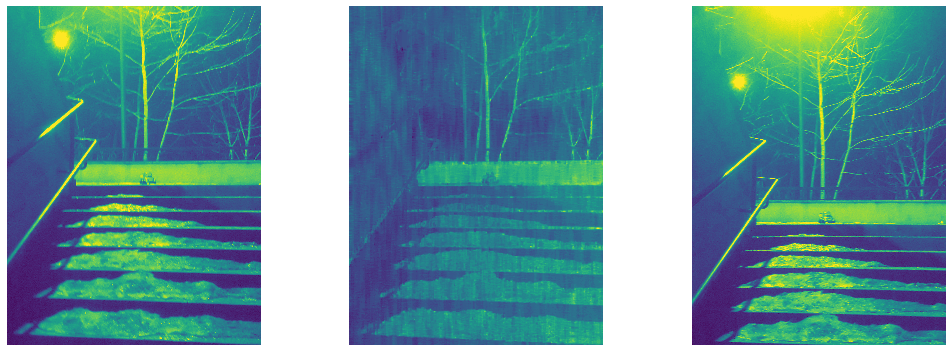

In [61]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
rotate_img = lambda img: np.array([img[:, :, i].reshape((w, h)).T for i in range(3)])
ax1.imshow(rotate_img(imgA)[0])
ax2.imshow(rotate_img(P)[0])
ax3.imshow(rotate_img(imgB)[0])
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
fig.tight_layout()
#plt.imshow(imgB, alpha=0.5)

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.imshow(imgA)
ax2.imshow(P)
ax3.imshow(imgB)
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
fig.tight_layout()

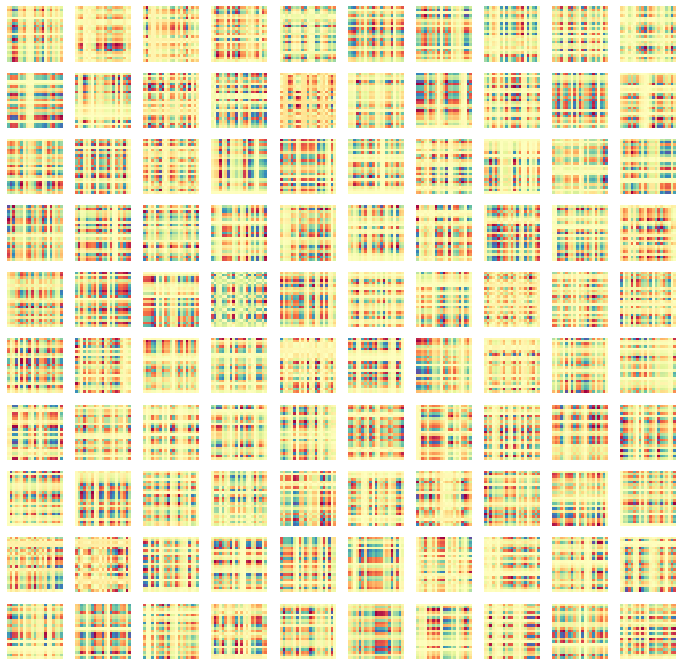

In [43]:
n = 400
p = np.linspace(-1, 1, n)
x, y = np.meshgrid(p, p)
x, y, z = x.flatten(), y.flatten(), p
o = np.ones((n**2))

m = 10
#fig, axX = plt.subplots(m, m, figsize=(12, 12))
#fig, axY = plt.subplots(m, m, figsize=(12, 12))
fig, ax = plt.subplots(m, m, figsize=(12, 12))

X = np.array([x**i for i in range(21)])
Y = np.array([y**i for i in range(21)])
k = 21
for i in range(m):
    for j in range(m):
        tx, ty = np.random.random((k,1))-0.5, np.random.random((k,1))-0.5
        #xt, yt= tx.dot(X), ty.dot(Y)
        #tz = np.random.random((1,6))-0.5
        zt = tx.dot(ty.T)
        #Z = (np.random.random()-0.5)*xt+(np.random.random()-0.5)*yt
        #Z = xt.reshape((n, n)).T.dot(yt.reshape((n, n)).T)
        #print(Z.shape, xt.shape, yt.shape)
        #ax[i][j].scatter(x, y, s=10, c=Z, cmap='Spectral')
        #Z = (Z-np.mean(Z))/np.std(Z)
        #axX[i][j].imshow(xt.reshape((n, n)))
        #axX[i][j].axis('off')
        #axY[i][j].imshow(xt.reshape((n, n)))
        #axY[i][j].axis('off')
        ax[i][j].imshow(zt, cmap='Spectral')
        ax[i][j].axis('off')


(15, 15)
(15, 10000)


ValueError: 'c' argument has 10000 elements, which is not acceptable for use with 'x' with size 10000, 'y' with size 10000.

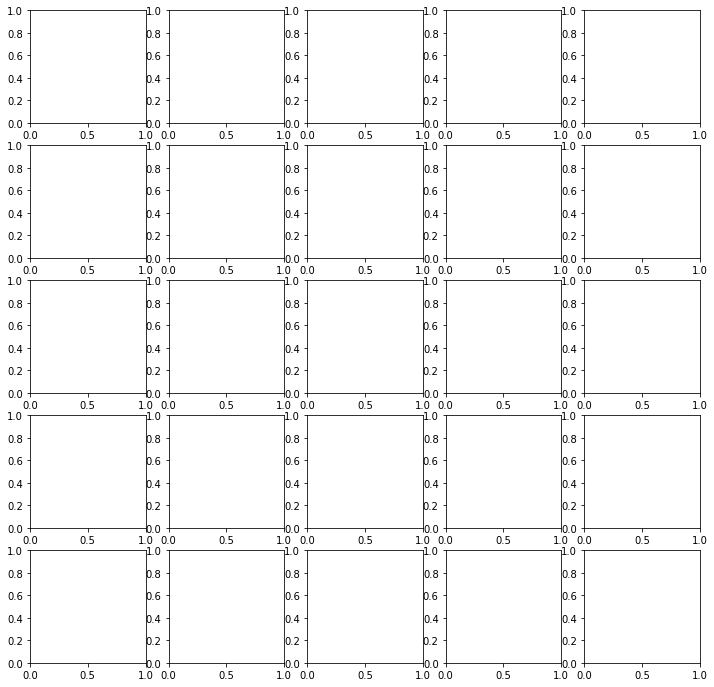

In [5]:
n = 100
p = np.linspace(-1, 1, n)
x, y = np.meshgrid(p, p)
x, y, z = x.flatten(), y.flatten(), p
o = np.ones((n**2))

m = 5
#fig, axX = plt.subplots(m, m, figsize=(12, 12))
#fig, axY = plt.subplots(m, m, figsize=(12, 12))
fig, ax = plt.subplots(m, m, figsize=(12, 12))

X = np.array([x**i for i in range(15)])
Y = np.array([y**i for i in range(15)])
k = 15
for i in range(m):
    for j in range(m):
        tx, ty = np.random.random((k,1))-0.5, np.random.random((k,1))-0.5
        #xt, yt= tx.dot(X), ty.dot(Y)
        #tz = np.random.random((1,6))-0.5
        zt = tx.dot(ty.T)
        print(zt.shape)
        #Z = (np.random.random()-0.5)*xt+(np.random.random()-0.5)*yt
        #Z = xt.reshape((n, n)).T.dot(yt.reshape((n, n)).T)
        Z = zt.dot(X)
        print(Z.shape)
        #print(Z.shape, xt.shape, yt.shape)
        #ax[i][j].scatter(x, y, s=10, c=Z, cmap='Spectral')
        #Z = (Z-np.mean(Z))/np.std(Z)
        #axX[i][j].imshow(xt.reshape((n, n)))
        #axX[i][j].axis('off')
        #axY[i][j].imshow(xt.reshape((n, n)))
        #axY[i][j].axis('off')
        #ax[i][j].imshow(Z, cmap='Spectral_r')
        ax[i][j].scatter(x, y, c=list(Z.T))
        ax[i][j].axis('off')


In [19]:
Q = np.array([[1, 1, 1, 1], [1, 1, -1, -1], [1, -1, -1, 1]]).T

In [20]:
Q.dot(np.linalg.inv((Q.T.dot(Q)))).dot(Q.T)

array([[ 0.75,  0.25, -0.25,  0.25],
       [ 0.25,  0.75,  0.25, -0.25],
       [-0.25,  0.25,  0.75,  0.25],
       [ 0.25, -0.25,  0.25,  0.75]])

In [17]:
Q.dot(Q.T)

array([[4, 0, 0],
       [0, 4, 0],
       [0, 0, 4]])

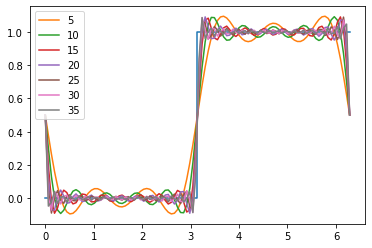

In [86]:
plt.plot([0, np.pi, np.pi, np.pi*2], [0, 0, 1, 1]) 
x = np.linspace(0, 2*np.pi, 100)
y = 1/2
for k in range(1, 40):
    if k%2 == 1:
        y += -2/np.pi/k*np.sin(k*x)
    if k%5==0:
        plt.plot(x, y, label=str(k))
plt.legend()

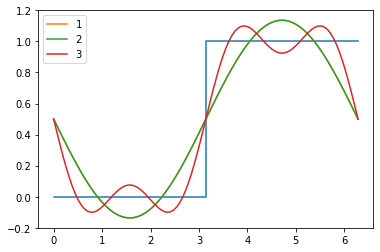

In [276]:
plt.plot([0, np.pi, np.pi, np.pi*2], [0, 0, 1, 1]) 
x = np.linspace(0, 2*np.pi, 100)
y = 1/2
for k in range(1, 4):
    if k%2 == 1:
        y += -2/np.pi/k*np.sin(k*x)
    plt.plot(x, y, label=str(k))
plt.legend()

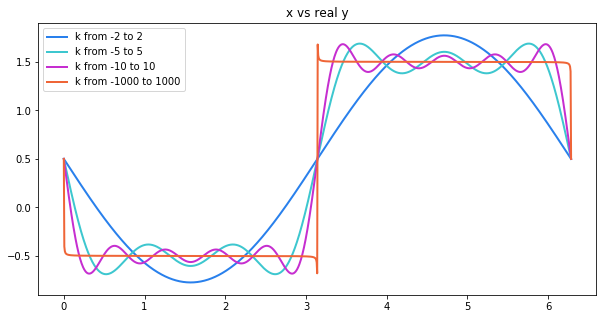

In [270]:
x = np.linspace(0, 2*np.pi, 1000)
#coefs = {i: (np.random.random()-0.5)*np.random.randint(0, 1001-i) for i in range(-1000, 1001)}
plt.figure(figsize=(10, 5))
for r in [2, 5, 10, 1000]:
    #cs = -(np.arange(0, 2*r, 1)%2)/np.pi
    ks = np.arange(-r, r+1, 1)
    y = [np.complex64(np.zeros((len(x),))*1/2)]
    for k in ks:
        if k%2==1:
            d = (np.e**(-k*x*1j)-np.e**(k*x*1j))/np.pi/k/1j
            y.append(d)
    y = np.sum(np.array(y), axis=0)
    y += 1/2
    c = np.random.random((3,))
    plt.plot(x, y.real, lw=2, color=c, label=f'k from {-r} to {+r}')
    #plt.plot(x, y.imag, lw=1, color=1-c, label='x vs y imaginary')
plt.title('x vs real y')
plt.legend()
plt.show()

In [228]:
y

array([0.5+0.0000000e+00j, 0.5-2.0000199e-04j, 0.5-4.0000398e-04j, ...,
       0.5+4.0000398e-04j, 0.5+2.0000199e-04j, 0.5+7.7963432e-16j],
      dtype=complex64)

In [134]:
y.imag

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

(-0.6955307785229736,
 3.269487085475916,
 -0.6483790404000831,
 1.3738700019378942)

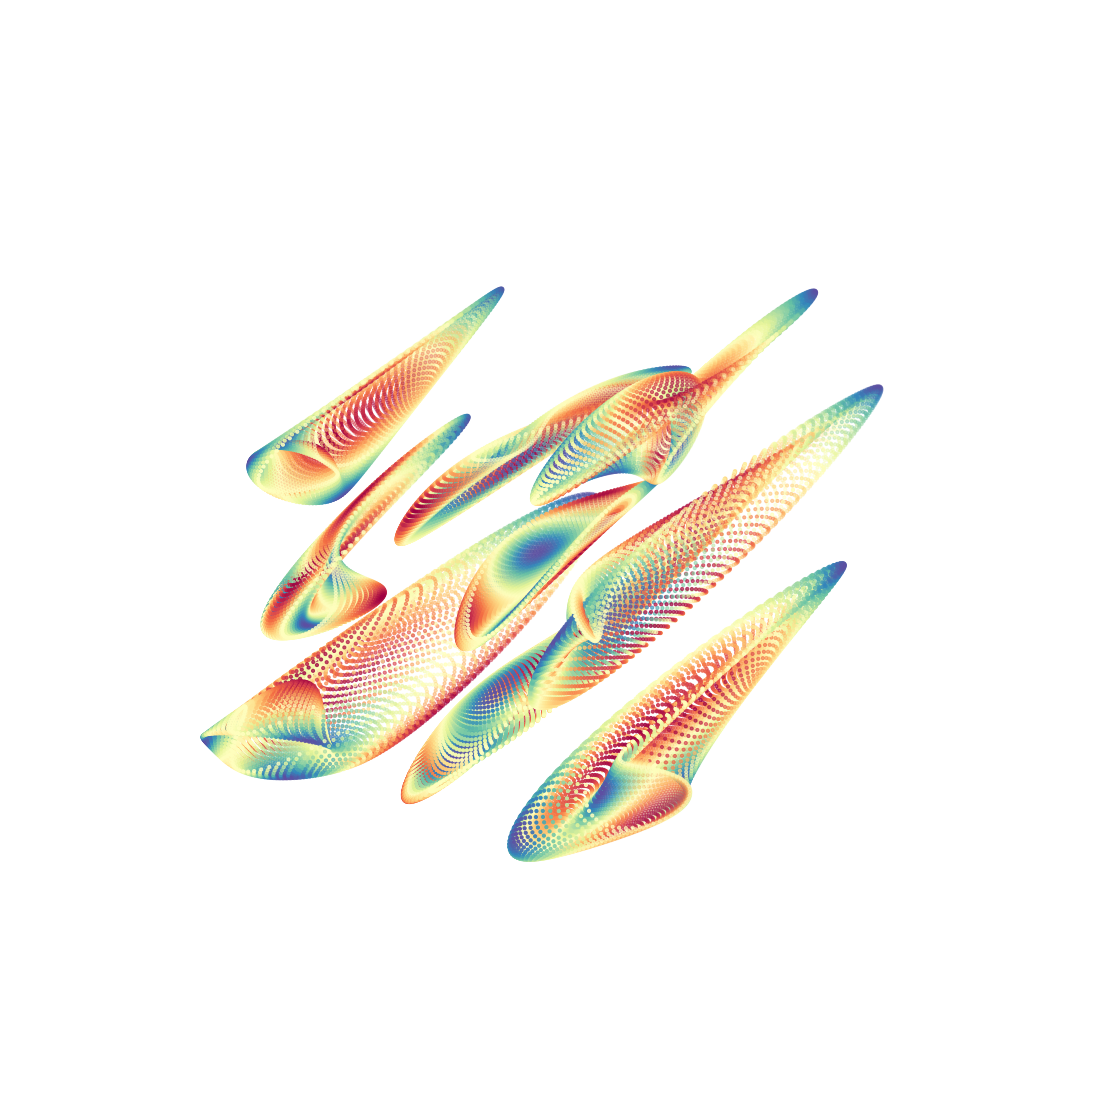

In [14]:
n = 100
p = np.linspace(0, np.pi*2, n)
a, b = np.meshgrid(p, p)
a, b = a.flatten(), b.flatten()
x, y, z = np.cos(b)*np.cos(a), np.cos(b)*np.sin(a), np.sin(b) 
#colors = [cm.Spectral(np.log((i*j*k)**(1/3))) for i,j,k in zip(x, y, z)]
cs = [i*j*k for i, j, k in zip(x, y, z)]
fig = plt.figure(figsize=(15, 15))
ax = Axes3D(fig)

#ax.scatter(x, y, z, s=1)
for j, A in enumerate(\
    [np.array([x, y, z, x*y, x*z, y*z]),
     np.array([x, y, z, x**2, y**2, z**2]),
    np.array([x, y, z, x*y, y*z, x*z, x**2, y**2, z**2])]):
    #c = np.random.random((3,))
    for i in range(3):
        transformation_short = np.random.random((3, A.shape[0]))/2
        AS = transformation_short.dot(A)
        #AS = AS-np.mean(AS)
        #AS = AS/np.max(AS)
        ax.scatter(AS[0]+j, AS[1], AS[2]+i, s=10, c=cs, cmap='Spectral')#color=c)
ax.axis('off')

c:\users\diana\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


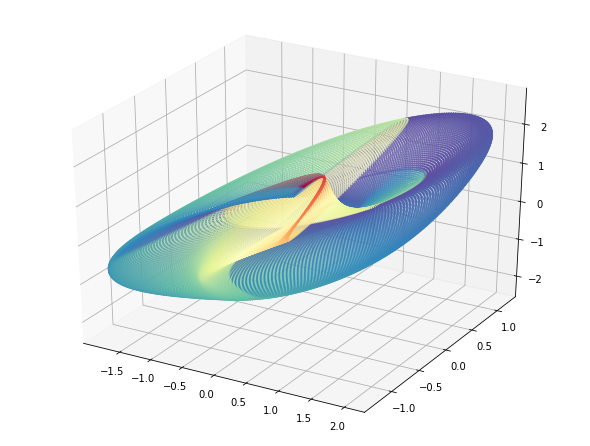

In [53]:
p = np.linspace(0, np.pi*2, 300)
v, theta = np.meshgrid(p, p)
v, theta = v.flatten(), theta.flatten()

x = np.cos(theta/2)*np.cos(v) - np.sin(theta/2)*np.sin(2*v)
y = np.sin(theta/2)*np.cos(v) + np.cos(theta/2)*np.sin(2*v)
z = np.cos(theta)*(1+np.sin(v))
w = np.sin(theta)*(1+np.sin(v))

points = np.array([x, y, z, w])
'''
transformation = np.random.random((4, 2))
print(points.shape, transformation.shape)

transformed = transformation.T.dot(points)

plt.figure(figsize=(5, 5))
plt.scatter(transformed[0], transformed[1], s=1)
plt.axis('off')
plt.show()
'''
transformation = np.random.random((4, 3))

transformed = transformation.T.dot(points)

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
ax.scatter(transformed[0], transformed[1], transformed[2], s=1,\
           c=theta*v*2, alpha=0.5, cmap='Spectral_r')
fig.show()